## Heart attack Prediction

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
heart_rate = pd.read_csv("heart.csv")
heart_rate.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_rate.shape

(303, 14)

In [6]:
heart_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_rate.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
heart_rate.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trtbps      0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalachh   -0.537410
exng        0.742532
oldpeak     1.269720
slp        -0.508316
caa         1.310422
thall      -0.476722
output     -0.179821
dtype: float64

<AxesSubplot:>

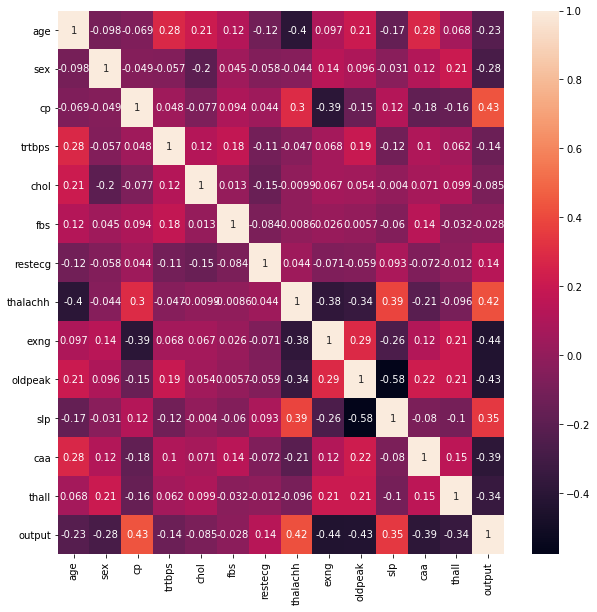

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_rate.corr(), annot=True)

In [14]:
heart_rate.isnull().sum().sum()

0

<AxesSubplot:>

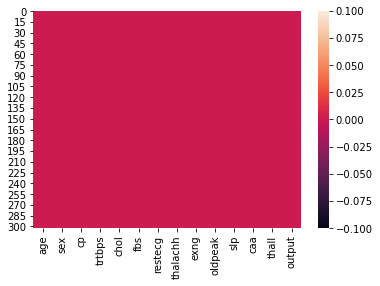

In [100]:
sns.heatmap(heart_rate.isnull())

In [15]:
heart_rate.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [85]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
normaldf = pd.DataFrame(pt.fit_transform(heart_rate))
normaldf.columns = heart_rate.columns

C:\Users\Sujay.Krishna\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [23]:
normaldf.skew()

age        -0.052593
sex        -0.791335
cp          0.104998
trtbps      0.000000
chol        0.000000
fbs         1.986652
restecg     0.006510
thalachh   -0.074975
exng        0.742532
oldpeak     0.124238
slp        -0.214969
caa         0.426394
thall      -0.075489
output     -0.179821
dtype: float64

In [91]:
x = heart_rate.drop("output", axis=1)
y = heart_rate["output"]

In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

## Dimensionality reduction using PCA
### Inspired by Thomas Ives, PHD

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc = StandardScaler()
sc_x = sc.fit_transform(x)
print(f"Shape of dataframe in original space is {sc_x.shape}","\n")
pca = PCA(n_components=11)
pca_x = pca.fit_transform(sc_x)
print(f"The shape of dataframe in Eigen space is {pca_x.shape}","\n")
print(f"The Eigen vectors are {pca.components_.T}","\n")
print(f"The Eigen values are {pca.explained_variance_}","\n")
#calculating relative importance of each eigen value
pc_eigenvalues = pca.explained_variance_/np.sum(pca.explained_variance_)*100
print(f"Importance of each eigen value in percentage {pc_eigenvalues}","\n")
#performing transformation between original and eigen space
xet = np.matmul(sc_x, pca.components_.T)
xe = np.matmul(pca_x,pca.components_)
print("Compare first values of pca_x and xet \n", pca_x[0,0], xet[0,0], "\n")
#Checking approximate match on original and eigen values
xet_pca_x_equal = np.array_equal(np.round(xet, 5), np.round(pca_x,5))
xe_sc_x_equal = np.array_equal(np.round(xe, 5), np.round(sc_x, 5))
print(f"xet and pca_x are equal:  {xet_pca_x_equal}","\n")
print(f"xe and sc_x are equal:  {xe_sc_x_equal}", "\n")

Shape of dataframe in original space is (303, 13) 

The shape of dataframe in Eigen space is (303, 11) 

The Eigen vectors are [[ 0.31420252  0.40614872 -0.09407661 -0.0206618  -0.30715312 -0.12829615
  -0.22373018 -0.2624772  -0.37900026 -0.01672242 -0.14054369]
 [ 0.09083783 -0.37779171  0.55484915 -0.25530873  0.0507044   0.05496875
  -0.16250682 -0.17599193 -0.1989252   0.53561904 -0.28760018]
 [-0.27460749  0.29726609  0.35697431  0.28790041  0.16317945 -0.19341117
  -0.21538959  0.04794993 -0.35143235  0.16435134  0.59428374]
 [ 0.18392019  0.43818675  0.2038493   0.02260103  0.18813809 -0.17945982
   0.33276335 -0.59533383  0.35039179  0.07152427 -0.06413037]
 [ 0.11737503  0.36451402 -0.40782498 -0.34340982  0.3200667  -0.10472957
   0.04932936  0.37238051 -0.1539752   0.49516986 -0.10887361]
 [ 0.07363999  0.31743328  0.48173624 -0.06860532 -0.23344184  0.24961364
   0.51081821  0.43286301 -0.17700437 -0.15369572 -0.14210271]
 [-0.12772792 -0.22088181 -0.08919083  0.26609555 -

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(pca_x, y, test_size = .2, random_state = 80)
lr = LogisticRegression()
lr.fit(x_train,y_train)
print(f"Train accuracy is: {lr.score(x_train,y_train)}","\n")
print(f"Test accuracy is: {lr.score(x_test,y_test)}","\n")

Train accuracy is: 0.8471074380165289 

Test accuracy is: 0.8360655737704918 



In [74]:
print(f"Hear attack prediction on Test data is: \n {lr.predict(x_test)}","\n")

Hear attack prediction on Test data is: 
 [0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1
 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1] 

